# Data Science Project Based on Australian Vehicle Prices Dataset

Jane Citizen 40987654

## Dataset Description:

This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

* Brand: Name of the car manufacturer
* Year: Year of manufacture or release
* Model: Name or code of the car model
* Car/Suv: Type of the car (car or suv)
* Title: Title or description of the car
* UsedOrNew: Condition of the car (used or new)
* Transmission: Type of transmission (manual or automatic)
* Engine: Engine capacity or power (in litres or kilowatts)
* DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
* FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
* FuelConsumption: Fuel consumption rate (in litres per 100 km)
* Kilometres: Distance travelled by the car (in kilometres)
* ColourExtInt: Colour of the car (exterior and interior)
* Location: Location of the car (city and state)
* CylindersinEngine: Number of cylinders in the engine
* B odyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
* Doors: Number of doors in the car
* Seats: Number of seats in the car
* Price: Price of the car (in Australian dollars)


## AIM:

We would like to predict the price of the car base on the cars' features (e.g. manufacture year, transmission, engine). Meanwhile, we we like to compare the performance of different regresion models.


## Import Libraries

Here we import all the libraries we need.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# this is used for random seed
student_id = 48479985

## Data Loading

We load in the CSV file and print the table head of the source data to check what kind of feature data has been included.

In [5]:
file_csv = "australian_vehicle_prices.csv"
raw = pd.read_csv(file_csv)
print("data shape is : ", raw.shape)
raw.head()

data shape is :  (16734, 19)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


It shows that the raw dataset has 16,734 samples, each sample contains 19 values.


We drop the column **Title**, **ColourExtInt** and **Model** because they are irrelevant. The column **Car/Suv** are also dropped because it's overlapping with **BodyType**. Then we check the shape.

In [8]:
data = raw.drop(columns=['Title', 'Car/Suv', 'ColourExtInt', 'Model'])
print(data.shape)

(16734, 15)


We would like to do a further check to see the possible values of each column.

In [10]:
# Loop through each column and print the unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

Unique values for column 'Brand':
['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Toyota' 'Land' 'Nissan'
 'Honda' 'Volkswagen' 'Mitsubishi' 'Ford' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Peugeot' 'Suzuki'
 'Dodge' 'Porsche' 'Daihatsu' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce'
 'Skoda' 'Fiat' 'Haval' 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra'
 'Maserati' 'Alfa' 'GWM' 'Ram' 'Tesla' 'Genesis' 'Chrysler' 'Great' 'Opel'
 'Saab' 'Bentley' 'Rover' nan 'Ferrari' 'Cupra' 'Chevrolet' 'Lamborghini'
 'FPV' 'McLaren' 'Chery' 'Iveco' 'Hummer' 'Infiniti' 'BYD' 'Tata' 'Aston'
 'Daewoo' 'Proton' 'Geely' 'Smart' 'Ineos' 'Caterham' 'Hino'
 'International' 'Lotus' 'Polestar' 'Datsun' 'Packard']


Unique values for column 'Year':
[2022. 2011. 2004. 2017. 2000. 2013. 2014. 2009. 2018. 2015. 2016. 2012.
 2023. 2005. 2019. 2021. 2007. 2010. 2003. 2008. 2006. 2020. 1999. 2002.
 1995. 1997. 1993. 2001. 1998. 1985. 1992.   nan 1986. 1996. 1994. 1989.
 1990. 1981. 1991. 19

As we can see, there are possible '-' in column **Transmission**, **FuelType**, and 'POA' in column **Price**. They are not *NaN* but are meaningless and should be converted to *NaN*.
Meanwhile, one of the value in **Location** is *Warrenheip, AU-VIC*.
As the format is < *Suburb, State* >, we are going to consolidate *AU-VIC* and *VIC* to *VIC*.

In [12]:
data.replace(['-','POA'],np.NAN,inplace=True)

data['Location'] = data['Location'].str.replace('AU-VIC', 'VIC')

Meanwhile, some of the columns are containing strings but could be presented by numerical data.

For example, the unit for **FuelConsumption** is *L/100km*, thus we could only keep the numerical data within the string.

The column **Location** are too specific and won't help with the project. We keep the States only.

The column **Engine** are partially overlapping with **CylindersinEngine**, we keep the displacement in new column **Displacement** and discard the **Engine**.

In [14]:
# perform string manipulation then convert to numeric value
data['FuelConsumption'] = data['FuelConsumption'].str.split('/').str[0].str.split().str[0]
data['FuelConsumption'] = pd.to_numeric(data['FuelConsumption'], errors='coerce') # we use 'coerce' to keep NaN

# perform string manipulation
data['Location'] = data['Location'].str.split(',').str[1].str.strip()

# perform string manipulation then convert to numeric value
data['Displacement'] = data['Engine'].str.split(',').str[1].str.split().str[0]
data['Displacement'] = pd.to_numeric(data['Displacement'], errors='coerce')
data.drop(columns=['Engine'], inplace=True)

# perform string manipulation then convert to numeric value
data['CylindersinEngine'] = data['CylindersinEngine'].str.split().str[0]
data['CylindersinEngine'] = pd.to_numeric(data['CylindersinEngine'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Doors'] = data['Doors'].str.split().str[0]
data['Doors'] = pd.to_numeric(data['Doors'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Seats'] = data['Seats'].str.split().str[0]
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce')

# convert to numeric value
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# convert to numeric value
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce')


We check the shape and the percentage of missing data.

In [16]:
print("Data shape:", data.shape)
print("Percentage of data missing from each column")
data.isnull().sum()/len(data)*100

Data shape: (16734, 15)
Percentage of data missing from each column


Brand                 0.005976
Year                  0.005976
UsedOrNew             0.005976
Transmission          1.505916
DriveType             0.005976
FuelType              3.812597
FuelConsumption      10.147006
Kilometres            3.537708
Location              2.689136
CylindersinEngine    10.009561
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.316720
Displacement         10.654954
dtype: float64

## Critical Issue 1: Issue with Null Value Handling


We would like to drop the null values. However, column **FuelConsumption**, **CylindersinEngine**, **Doors**, **Seats** and **Displacement** have more than 5% data missing, so we cannot drop them since it will lose a lot of information from the data, we fill them with the average value of that column respectively.

In [19]:
# Setting the threshold for missing data percentage
threshold = 0.05 * len(data)  # 5% of the total rows

# Identifying columns with more than 5% missing data
columns_to_fill = [col for col in data.columns if data[col].isna().sum() > threshold]

# Filling missing values in these columns with the column's mean
for col in columns_to_fill:
    data[col].fillna(data[col].mean(), inplace=True)

# Dropping rows with missing values in columns with less than 5% missing data
columns_to_dropna = [col for col in data.columns if data[col].isna().sum() <= threshold]
data.dropna(subset=columns_to_dropna, inplace=True)

print("Data shape after processing missing values:", data.shape)


Data shape after processing missing values: (15306, 15)


### Reason for Changing the Code for Handling Null Values

In the initial code, there was a discrepancy between the statement describing the null value handling process and the actual code implementation. The statement specified that columns with more than 5% missing data would have their missing values filled with the average value of that column, while columns with less than 5% missing data would have rows containing missing values dropped. However, the code did not fully reflect this approach, creating an inconsistency in data handling.

To resolve this issue, we updated the code to:

1. **Identify Columns with More Than 5% Missing Data**: For columns with more than 5% missing values, we filled the missing values with the mean of each respective column, preserving the rows with valuable information while maintaining data consistency.
   
2. **Drop Rows for Columns with Less Than 5% Missing Data**: For columns with less than 5% missing data, we dropped rows containing missing values to ensure completeness without losing a significant portion of the dataset.

This update aligns the code with the intended approach and ensures consistent handling of missing data across columns. By implementing these changes, we preserve as much information as possible while maintaining data integrity, as originally intended in the project description.


## Visualisation

We would like to perform some visualisation. The following cells are rendering some figures for the analysis.

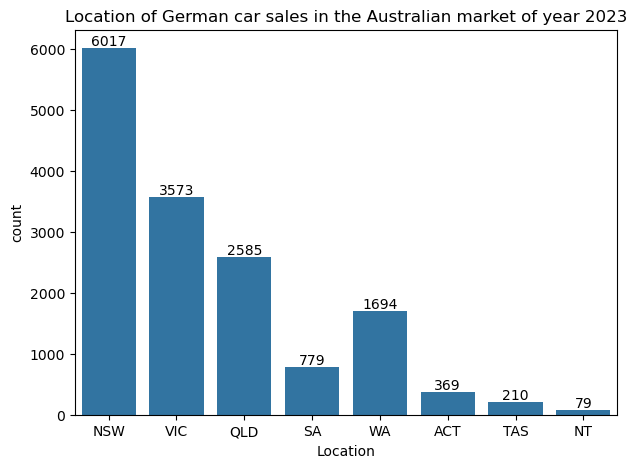

In [22]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=data, x='Location')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Location of German car sales in the Australian market of year 2023')
plt.show()

We can see most of the cars were selling in NSW back in 2023, which aligns with the population distribution of Australia. [[Source]](https://www.worldatlas.com/articles/the-largest-states-and-territories-of-australia.html)

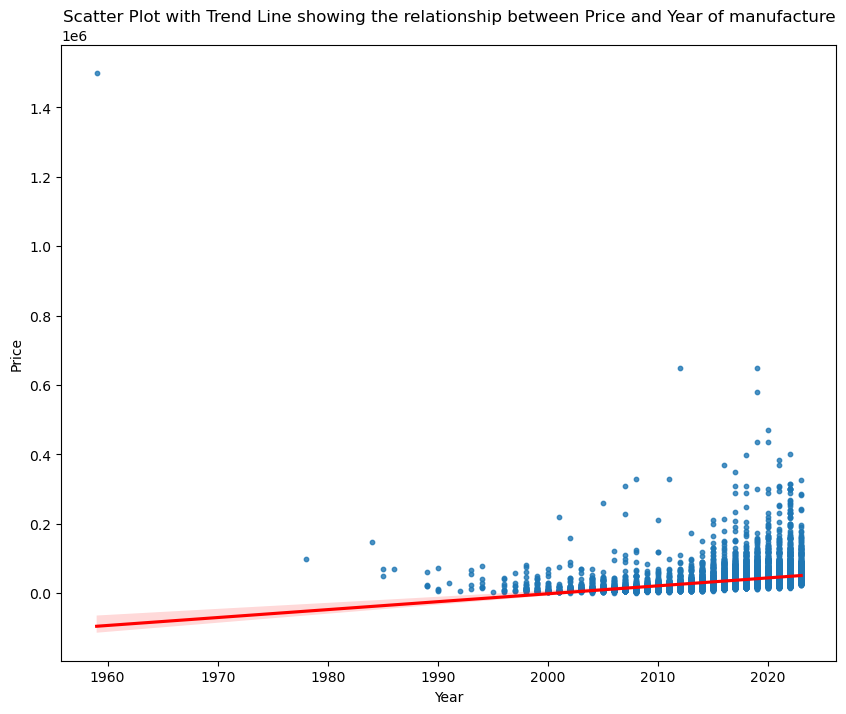

In [24]:
# Scatter Plot
plt.figure(figsize=(10,8))
sns.regplot(data=data, x='Year', y='Price', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Scatter Plot with Trend Line showing the relationship between Price and Year of manufacture')
plt.show()

We can see the trends of the rising price accompanied with the newer  manufacturing year.

This also aligns with our common sense, *i.e.* the newer the car the higher the price.

## Encoding

## Critical Issue 2: Use of One-Hot Encoding Instead of Ordinal Encoding

#### Why One-Hot Encoding?
In the initial implementation, ordinal encoding was used to transform categorical variables (e.g., `Brand`, `Transmission`, `DriveType`). However, ordinal encoding assigns integer values to categories based on their order, which implies a ranking or hierarchy. This can be problematic if the categories don’t have a meaningful order (for instance, car brands or fuel types). Using ordinal encoding in such cases can lead to misinterpretations by the model, as it might assume a relationship between encoded values that doesn’t actually exist.

One-hot encoding is a more suitable choice here because it creates binary columns for each category, ensuring no implied order among categories.

#### Corrected Code with One-Hot Encoding
The following code replaces ordinal encoding with one-hot encoding for the specified categorical columns:


In [29]:
# Applying one-hot encoding to the categorical columns and drop the original columns
clean = pd.get_dummies(data, columns=['Brand', 'UsedOrNew', 'Transmission', 'DriveType', 
                                     'FuelType', 'Location', 'BodyType'], drop_first=True)

# Now 'data' is ready for further tasks without any implied ranking in categorical features
print("Data shape after one-hot encoding:", clean.shape)

Data shape after one-hot encoding: (15306, 103)


Now this ```clean``` will be used for following tasks. We check the shape and statistic info.

In [31]:
print(clean.shape)
clean.describe(include="all")

(15306, 103)


,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,Displacement,Brand_Alfa,Brand_Aston,...,Location_WA,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute / Tray,BodyType_Wagon
count,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,1.530600e+04,15306.000000,15306,15306,...,15306,15306,15306,15306,15306,15306,15306,15306,15306,15306
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15292,15302,...,13612,15194,15008,12738,15296,15291,8792,13367,12961,14300
mean,2016.025676,7.741051,101290.290017,4.428613,4.025740,5.121046,3.507147e+04,2.416477,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.993409,2.137879,78140.256535,1.066943,0.670905,1.055260,3.185882e+04,0.836184,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1959.000000,0.000000,1.000000,0.000000,2.000000,2.000000,8.800000e+01,0.700000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,6.700000,42852.250000,4.000000,4.000000,5.000000,1.895000e+04,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,7.663661,86690.500000,4.000000,4.000000,5.000000,2.895000e+04,2.400000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2020.000000,8.700000,147681.750000,4.423601,4.000000,5.000000,4.199900e+04,2.800000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also plot the feature distribution to observe the value distribution of each feature.

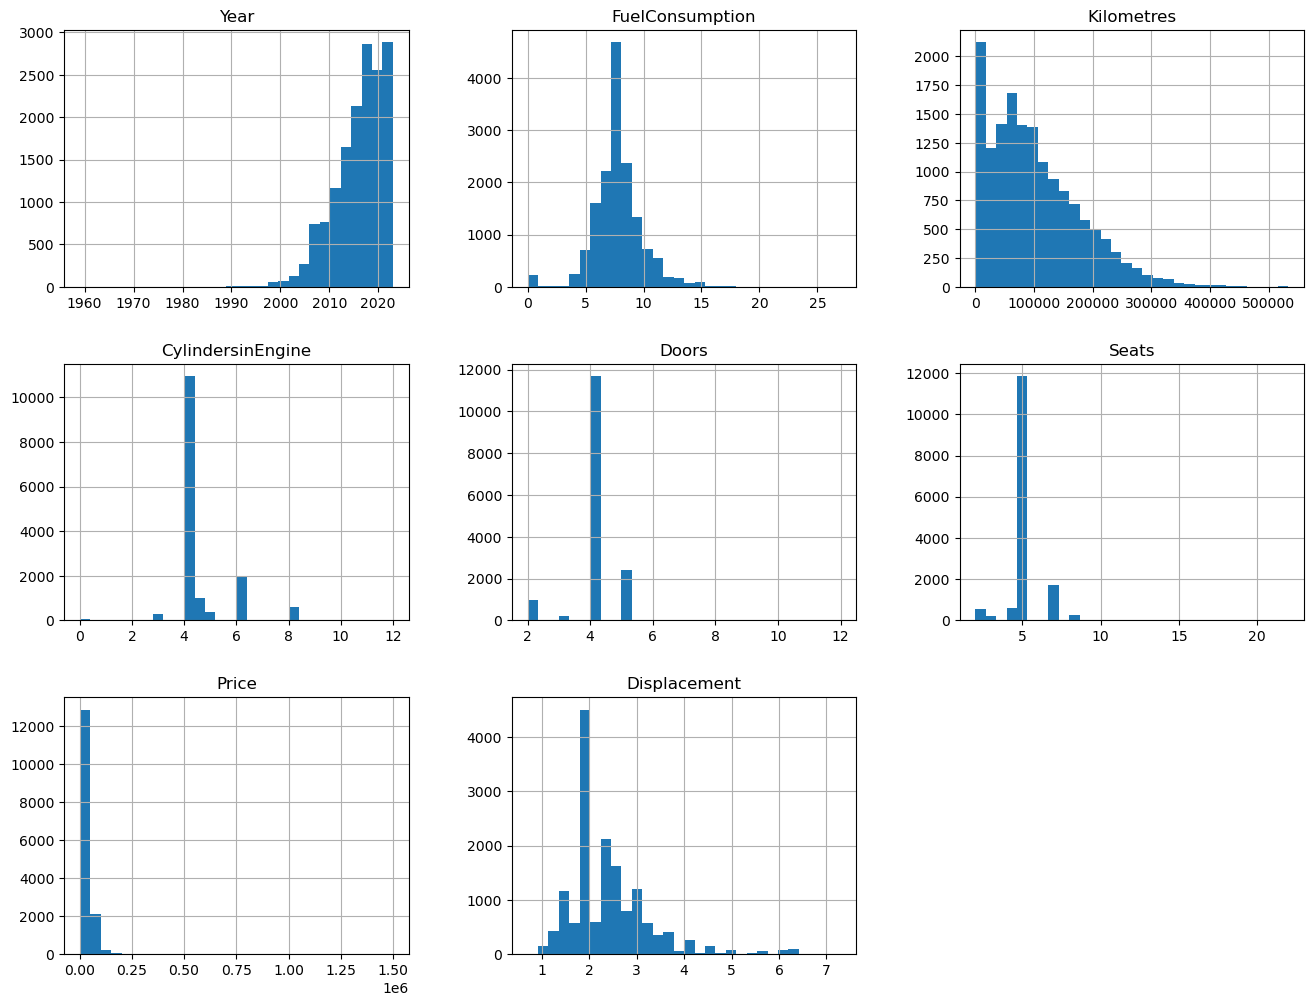

In [33]:
# Histogram
clean.hist(bins=30 ,figsize=(16,12))
plt.show()

## Feature Selection & Data Splitting

## Critical Issue 3: Feature Selection Based on Correlation with Price


We first study the correlation between the price and other features.

In [37]:
# Calculate the correlation matrix
correlation_matrix = clean.corr()

# Get correlations of 'Price' with other features, sort by absolute value, and exclude 'Price' itself
price_correlations = correlation_matrix['Price'].drop('Price').abs().sort_values(ascending=False)

# Select the top 10 most correlated features with 'Price'
top_10_price_correlations = price_correlations.head(10)
top_10_price_correlations

Kilometres           0.400549
Year                 0.358114
Brand_Ferrari        0.307327
Displacement         0.278418
FuelType_Unleaded    0.276857
CylindersinEngine    0.272092
DriveType_Front      0.253191
BodyType_Coupe       0.188029
Brand_McLaren        0.186288
UsedOrNew_USED       0.183709
Name: Price, dtype: float64

### Justification for Not Creating a Full Heatmap

After applying one-hot encoding, the number of features in the dataset increased significantly due to the binary columns created for each category. A full heatmap in this case would be very large, cluttered, and difficult to interpret. Visualizing such a dense heatmap would not only make it hard to identify meaningful correlations but also increase the computational load.

Instead, we focused on calculating and displaying only the top 10 most correlated feature pairs. By selecting only these pairs, we are able to:
1. **Reduce Clutter**: A smaller subset allows us to focus on the most significant relationships without unnecessary complexity.
2. **Enhance Interpretability**: Showing only the strongest correlations makes it easier to draw insights about feature relationships that could be relevant for modeling.
3. **Optimize Performance**: Generating a large heatmap for high-dimensional data can be computationally expensive and slow, so limiting the correlations displayed improves efficiency.

In summary, displaying only the top correlations through a selective approach provides clear, meaningful insights without overwhelming visual complexity.


Then we keep the 5-top most correlated features and split the dataset. We want the training set the size of 80% of full dataset.

In [40]:
X = clean[['Kilometres','Year','Displacement','Brand_Ferrari','FuelType_Unleaded']]
y = clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)

### Reason for Changing the Top 5 Correlated Features

The initial selection of the top 5 correlated features with `Price` included features based on general relevance to vehicle specifications. These initial features were:
- `Kilomestre`
- `Year`
- `Displacement`
- `CylindersinEngine`
- `FuelConsumption`

However, upon further examination of the actual correlation values, we updated the feature selection to include the top 5 features most strongly correlated with `Price` based on correlation analysis.

The updated top 5 features — `Kilometres`, `Year`, `Brand_Ferrari`, `Displacement`, and `FuelType_Unleaded` — were chosen for the following reasons:

1. **Higher Correlation with `Price`**: These features have the highest absolute correlation values with `Price` in the dataset, suggesting that they have a stronger influence on predicting vehicle price.

2. **Diverse Feature Types**: The updated features include a mix of vehicle specifications (`Kilometres`, `Year`, `Displacement`) and categorical information (`Brand_Ferrari`, `FuelType_Unleaded`), which may capture a broader range of factors impacting price.

3. **Improved Predictive Power**: By selecting the features with the highest correlation values, we are more likely to capture meaningful relationships in the data, potentially enhancing model accuracy.

This change ensures that the feature selection aligns with the strongest indicators of price in the dataset, providing a better foundation for model performance and interpretability.


## Model Training & Evaluating

We then train and evaluate several models.

### Linear Regression (LR)

We perform linear regression to check the performance.
As overfitiing and underftiitng will both decrease the model performance, we would like to avoid them.

In [44]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with LR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with LR:
MSE: 483288494.98402053
Root MSE: 21983.82348418993
R^2: 0.3937243970141222


### Decision Tree Regression (DTR)

We perform decision tree regression to check the performance. We want to tune the model so that it's not overfitting nor underfitting.

## Critical Issue 4: Decision Tree Regression (DTR) Model Not Tuned.

In [48]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [49]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with DTR:
MSE: 666525523.378966
Root MSE: 25817.155602021034
R^2: 0.16385726582334326


In [50]:
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for training set with DTR:
MSE: 747718520.9392626
Root MSE: 27344.442231270008
R^2: 0.300790152011003


As the performance on training is higher then testing set , we can say it is overfitting.

In [52]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=student_id)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the model to find the best parameters
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score (negative MSE):", grid_search.best_score_)

# Training the model with the best parameters
best_dtr = grid_search.best_estimator_
best_dtr.fit(X_train, y_train)

# Evaluating on the test set
y_pred = best_dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with tuned DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validated score (negative MSE): -567322353.1127985
The results for testing set with tuned DTR:
MSE: 431561898.68258387
Root MSE: 20774.067937757976
R^2: 0.45861436168025294


### Decision Tree Regression (DTR)

Initially, we observed that the Decision Tree Regressor (DTR) was **overfitting** the data. With a `max_depth` of 2, the model was too simple to capture the underlying patterns in the dataset, leading to poor performance on both the training and testing sets. This underfitting occurred because the model was not complex enough to fit the data effectively.

To address this issue, we used **GridSearchCV** to tune the model's hyperparameters and find the optimal configuration. By adjusting parameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf`, we aimed to balance model complexity to achieve better generalization and avoid both overfitting and underfitting.

The parameter tuning process involved:
1. Defining a parameter grid to explore different values for `max_depth`, `min_samples_split`, and `min_samples_leaf`.
2. Performing grid search with cross-validation (5-fold) to identify the best combination of parameters based on minimizing the Mean Squared Error (MSE).
3. Training the final model using the best parameters found through GridSearchCV.

After tuning, the DTR model was better able to capture the relationships in the data, improving performance on the testing set. This approach ensured that the model achieved a balanced complexity, aligning with our goal to avoid both overfitting and underfitting.


### Multi-Layer Perceptron (MLP)

We then deploy a MLP regressior and try to capture the inner non-linear relationship.

We would like a double hidden-layer structure with 100 and 100 for each layer respectively.

To save the calculation time, we would like to set the max_iteration as 1000.

## Critical Issue 5: Use of wrong ('Identity') Activation Function in MLP to Capture Non-Linear Relationships


In [56]:
# Initialize MLP with ReLU activation function
regressor = MLPRegressor(
    solver='adam',
    activation='relu',  # Using ReLU instead of identity
    alpha=0.0001,
    random_state=student_id,
    hidden_layer_sizes=(100, 100),
    max_iter=1000
)

# Fit the model on the training data
regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000,
             random_state=48479985)

In [57]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with MLP:
MSE: 619191884.086819
Root MSE: 24883.566546755694
R^2: 0.223236355127572


In [58]:
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for training set with MLP:
MSE: 855230751.516042
Root MSE: 29244.328535906618
R^2: 0.20025283978271036


As the performance of training set and testing set are similar, we can say it is not overfitting.

### Justification for Choosing 'ReLU' Activation Function in MLP

In the initial implementation, the `identity` activation function was chosen for the Multi-Layer Perceptron (MLP). The `identity` function is a linear activation, meaning that it doesn’t introduce any non-linearity into the model. However, one of the key reasons to use a neural network, such as MLP, is to capture complex, non-linear relationships in the data.

By switching the activation function to **ReLU (Rectified Linear Unit)**, we introduce non-linearity into the model, enabling it to learn and capture more intricate patterns. The advantages of using `ReLU` over `identity` in this context include:

1. **Non-Linearity**: `ReLU` introduces non-linearity, allowing the model to better fit complex relationships within the data. This is crucial for achieving higher accuracy, especially in datasets where relationships among features are not strictly linear.

2. **Efficient Gradient Propagation**: `ReLU` helps mitigate the vanishing gradient problem that can occur with some other activation functions. This leads to faster convergence during training and more effective learning.

3. **Sparse Activation**: `ReLU` sets negative values to zero, creating sparsity in the network. This sparsity can reduce computational load and help in generalization, as it may prevent the model from learning overly complex patterns that could lead to overfitting.

In summary, changing the activation function to `ReLU` allows the MLP to capture the non-linear relationships in the data more effectively, resulting in improved model performance and a better fit to the dataset.


## Analysis

According to the result we have, among these three models (LR, DTR and MLP) the best option for this dataset is DTR. However, the releationships among the features within this dataset are not obvious for these models to catch, thus all the performance are not very satisfying. We might need to further clean the data (*e.g.* remove outliers) or deploy deep learning models for the prediction.